In [213]:
import pandas as pd
import numpy as np
from random import randint
from random import random
df = pd.read_csv("../genres_v2.csv")
df.drop(columns=["uri","track_href", "title", "analysis_url", "id","Unnamed: 0"],inplace=True,axis=1)

# Create Inconsistent Data
df["duration_ms"] = [-x if randint(0,10) == 3 else x for x in df["duration_ms"].values]
df["loudness"] = [randint(70, 120) if randint(0,100) == 42 else x for x in df["loudness"].values]
df["key"] = [x+random() for x in df["key"].values]

# Create Dictionary with column name, type, and real type.
fields = {"Fields":[str(x) for x in df.columns], "Types":[str(df[x].dtype) for x in df.columns],
         "Real Type": ["int64" if x == "key" else str(df[x].dtype) for x in df.columns]}

display(df.sample(10))
fields_DataFrame = pd.DataFrame(data=fields)
display(fields_DataFrame)
display(df.sample(5))

C:\Users\96653\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
37807,0.622,0.937,1.810138,-3.360,1,0.0501,0.008100,0.030600,0.0727,0.4000,175.062,audio_features,354991,4,dnb,NaN
36604,0.687,0.971,11.181473,-0.294,1,0.0826,0.000223,0.868000,0.1210,0.0414,172.027,audio_features,216279,4,dnb,NaN
36045,0.734,0.958,1.727553,-0.688,0,0.1990,0.058600,0.215000,0.3310,0.3660,149.930,audio_features,236800,4,trap,NaN
18208,0.572,0.802,5.306326,-5.286,0,0.0412,0.012500,0.000101,0.1350,0.5550,174.030,audio_features,193103,4,Pop,Out of My Head
9865,0.727,0.695,10.957263,-5.980,0,0.3210,0.513000,0.000000,0.3650,0.7270,183.822,audio_features,231472,4,Underground Rap,"Full Circle (feat. The Firm, AZ, Foxy Brown & ..."
38003,0.563,0.966,11.767754,-1.006,0,0.0584,0.000601,0.712000,0.4490,0.4150,175.016,audio_features,285257,4,dnb,NaN
33348,0.627,0.982,8.825620,-6.483,1,0.0617,0.003280,0.883000,0.2530,0.4570,138.598,audio_features,290974,4,psytrance,NaN
20224,0.410,0.886,9.404278,-4.413,0,0.1550,0.067100,0.000000,0.4610,0.3930,145.154,audio_features,136351,4,Hiphop,On God
24511,0.873,0.752,8.295279,-7.983,1,0.0507,0.000351,0.837000,0.4350,0.2710,128.005,audio_features,382500,4,techno,NaN
7255,0.728,0.727,2.704434,-3.585,1,0.2060,0.012800,0.000000,0.0882,0.8900,143.144,audio_features,171467,4,Underground Rap,Start a Riot


,Fields,Types,Real Type
0,danceability,float64,float64
1,energy,float64,float64
2,key,float64,int64
3,loudness,float64,float64
4,mode,int64,int64
5,speechiness,float64,float64
6,acousticness,float64,float64
7,instrumentalness,float64,float64
8,liveness,float64,float64
9,valence,float64,float64


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
40937,0.530,0.980,9.395656,-5.230,0,0.0917,0.00871,0.066200,0.0768,0.272,150.022,audio_features,337739,4,hardstyle,NaN
3333,0.608,0.907,5.188530,-2.919,1,0.1330,0.06450,0.002680,0.0851,0.344,171.967,audio_features,280440,4,Dark Trap,Box Cutter
10709,0.758,0.804,9.281595,-5.683,1,0.2560,0.31700,0.000279,0.2670,0.434,125.064,audio_features,-150135,4,Trap Metal,Adrenaline
30817,0.588,0.883,2.668885,-6.675,1,0.0361,0.00045,0.860000,0.2660,0.159,145.995,audio_features,420822,4,psytrance,NaN
12945,0.392,0.710,0.614292,-6.391,0,0.0402,0.01200,0.000002,0.2930,0.512,160.096,audio_features,233813,4,Emo,Someday


In [214]:
# Part 2.b.1
# Dictionary listing which column has inconsistent or missing data.
fields2 = {"Fields":[str(x) for x in df.columns], 
          "Inconsistencies":[True if x in [2, 14] else False for x in range(len(df.columns))],
         "Missing Data": [True if df[col].isnull().any() else False for col in df.columns]}
# Create dataframe for the dictionary.
fields2_DataFrame = pd.DataFrame(data=fields2)

# Change key from float64 to int64
df['key'] = df['key'].apply(lambda x: int(x))

# Impute Song names with NaN values to No name.
df["song_name"] = df["song_name"].fillna("No Name")

# Changing duration_ms to seconds for convenience and fixing inconsistency for negative values.
df.rename(columns = {'duration_ms':"duration_sec"}, inplace = True)
df["duration_sec"] = df["duration_sec"].apply(lambda x: abs(int(x/1000)))

display(fields2_DataFrame)
display(df)

,Fields,Inconsistencies,Missing Data
0,danceability,False,False
1,energy,False,False
2,key,True,False
3,loudness,False,False
4,mode,False,False
5,speechiness,False,False
6,acousticness,False,False
7,instrumentalness,False,False
8,liveness,False,False
9,valence,False,False


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_sec,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,124,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,224,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,98,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,123,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,123,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,269,4,hardstyle,No Name
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,210,4,hardstyle,No Name
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,234,4,hardstyle,No Name
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,323,4,hardstyle,No Name


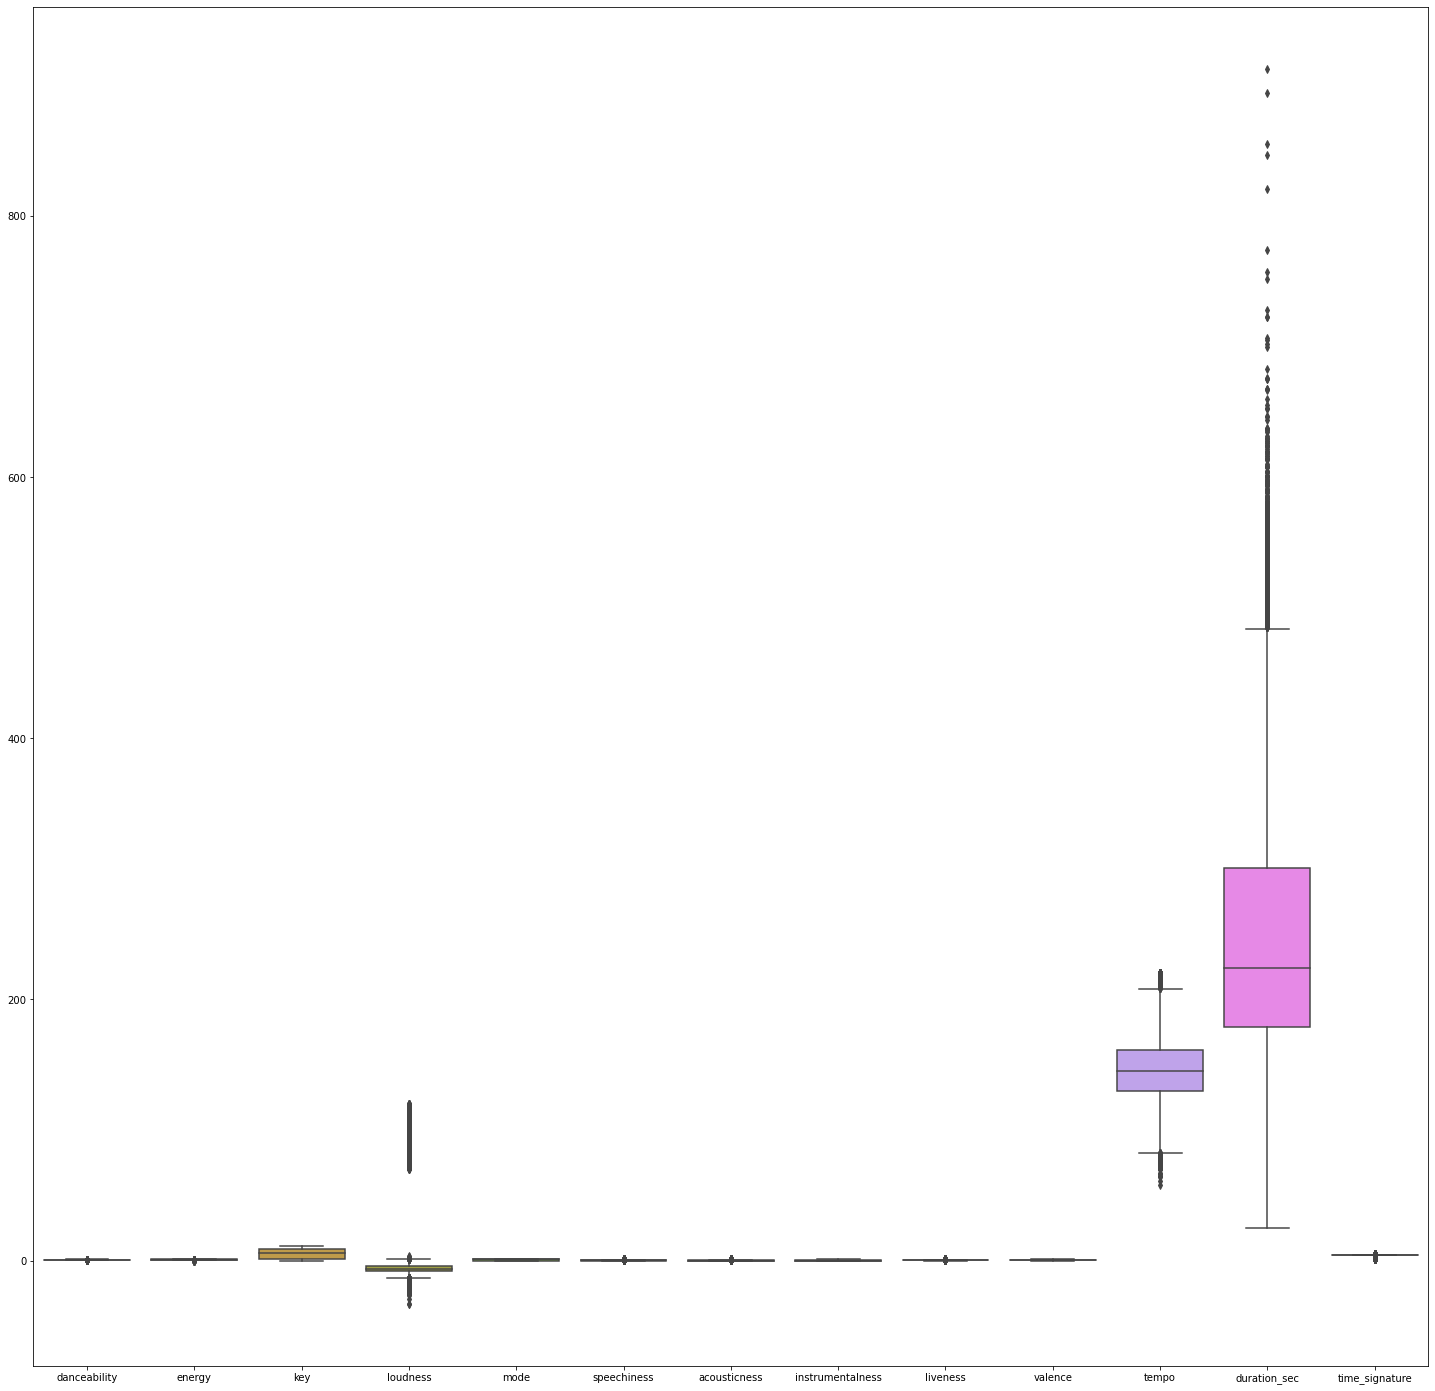

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(25,25))
sns.boxplot(data=df)
plt.show()  

(42305, 13)
(27292, 13)


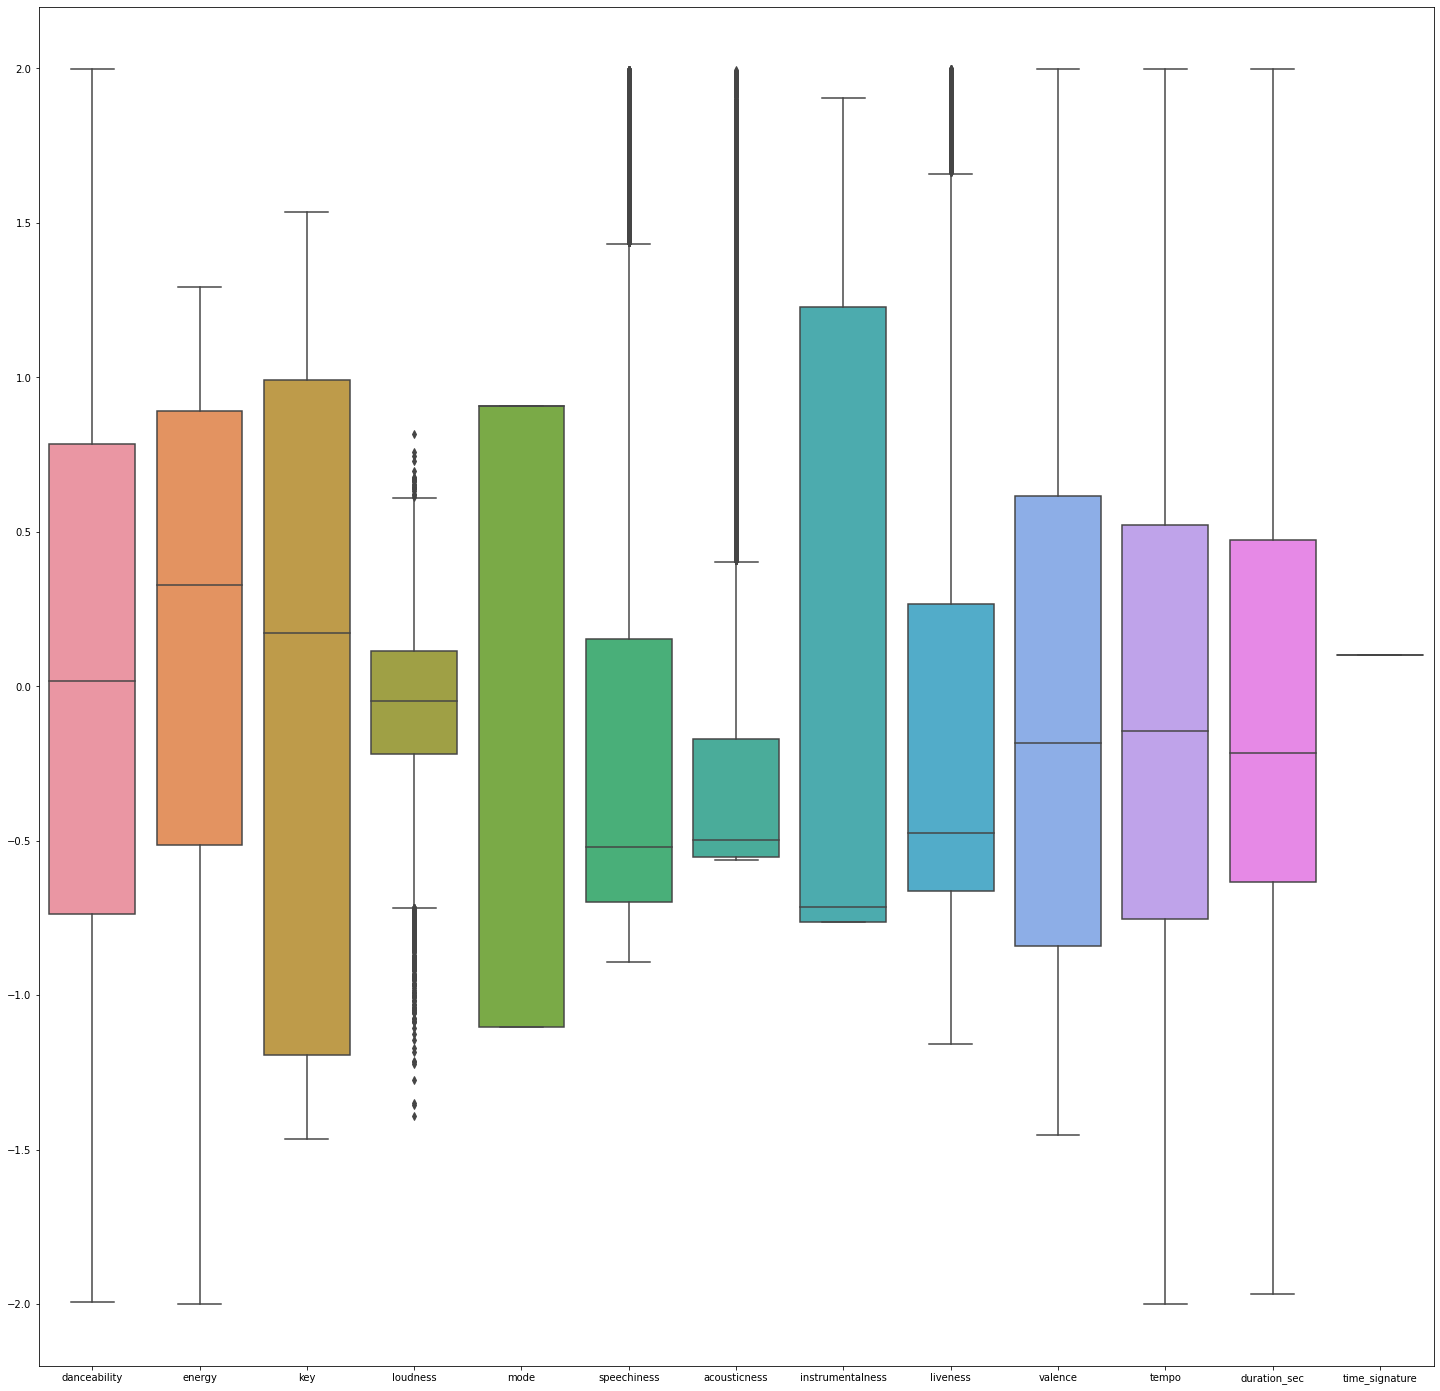

In [216]:
from sklearn.preprocessing import StandardScaler

scaled_values = StandardScaler().fit_transform(df[numeric_columns])

df2=pd.DataFrame(scaled_values,columns=df[numeric_columns].columns)

print(df2.shape)
threshold = 2
selected_rows= (df2<threshold).all(axis=1)  & (df2>-threshold).all(axis=1)
selected_index=df[~selected_rows].index
df2.drop(index=selected_index,inplace=True) # for analysis
ndf=df.drop(index=selected_index)  # for interpretation
ndf.reset_index(inplace = True, drop = True) # to reset the index 
print(df2.shape)

plt.figure(figsize=(25,25))
sns.boxplot(data=df2)
plt.show() 
